In [336]:
# penguins: body_mass_g
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = sns.load_dataset('penguins')
df.dropna(inplace=True)
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


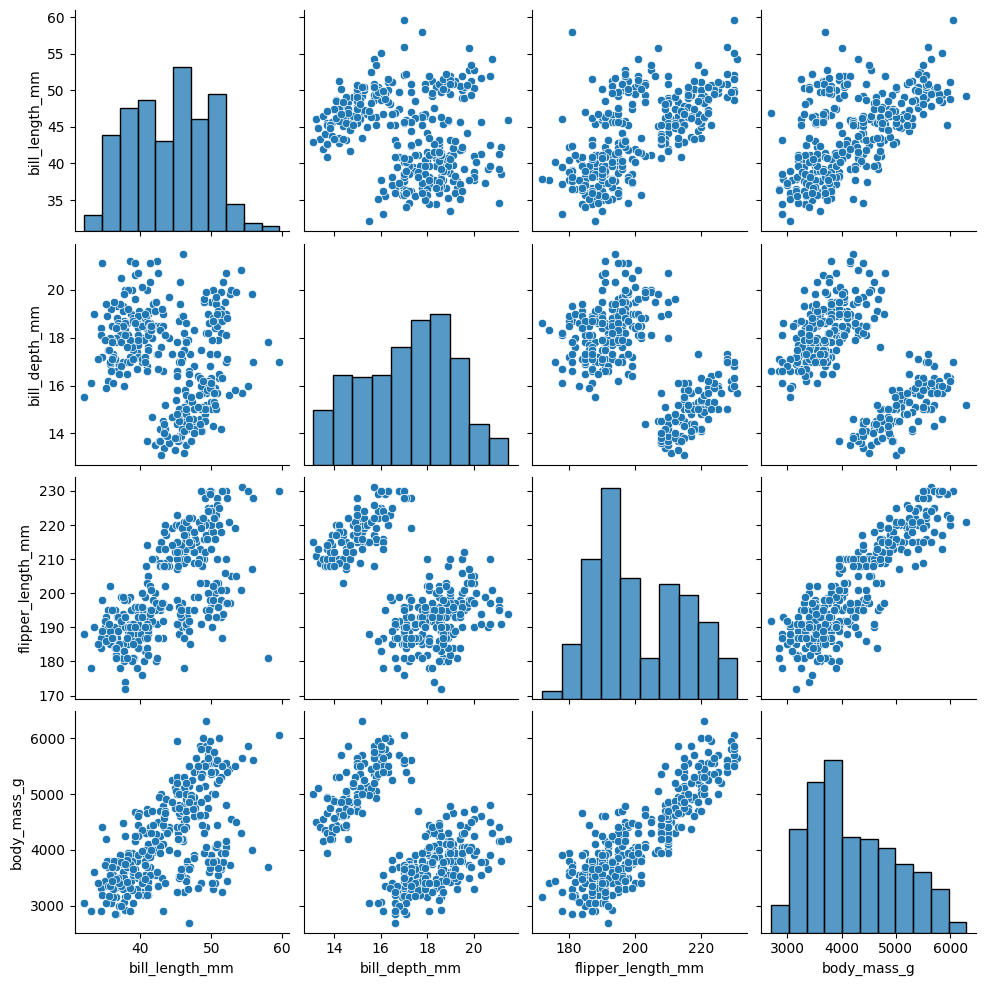

In [337]:
sns.pairplot(df)

In [338]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, root_mean_squared_error, mean_absolute_percentage_error

# Separar X e y
X = df[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm']]
y = df['body_mass_g']

# DataFrame de resultados:
df_resultados = pd.DataFrame(columns=['Modelo', 'R2', 'MAE', 'RMSE', 'MAPE'])

# Regresión lineal múltiple
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

r2 = r2_score(y, y_pred)
mae = mean_absolute_error(y, y_pred)
rmse = root_mean_squared_error(y, y_pred)
mape = mean_absolute_percentage_error(y, y_pred) # (multiplicar mentalmente por 100) error promedio 7,7 % respecto del valor real de la masa corporal

df_resultados.loc[len(df_resultados)] = ['RLM 3 col', r2, mae, rmse, mape]
df_resultados

,Modelo,R2,MAE,RMSE,MAPE
0,RLM 3 col,0.763937,310.062518,390.637086,0.077183


In [339]:
df = pd.get_dummies(df)
df.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_Female,sex_Male
0,39.1,18.7,181.0,3750.0,True,False,False,False,False,True,False,True
1,39.5,17.4,186.0,3800.0,True,False,False,False,False,True,True,False
2,40.3,18.0,195.0,3250.0,True,False,False,False,False,True,True,False
4,36.7,19.3,193.0,3450.0,True,False,False,False,False,True,True,False
5,39.3,20.6,190.0,3650.0,True,False,False,False,False,True,False,True


<Axes: >

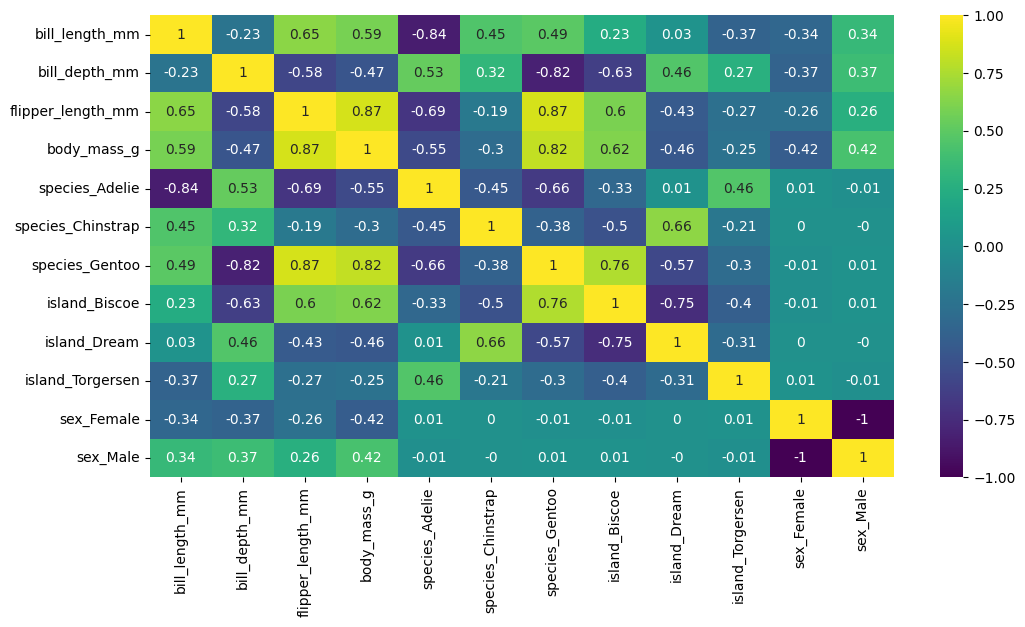

In [340]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr().round(2), annot=True, cmap='viridis')
# RLM con todas las columnas

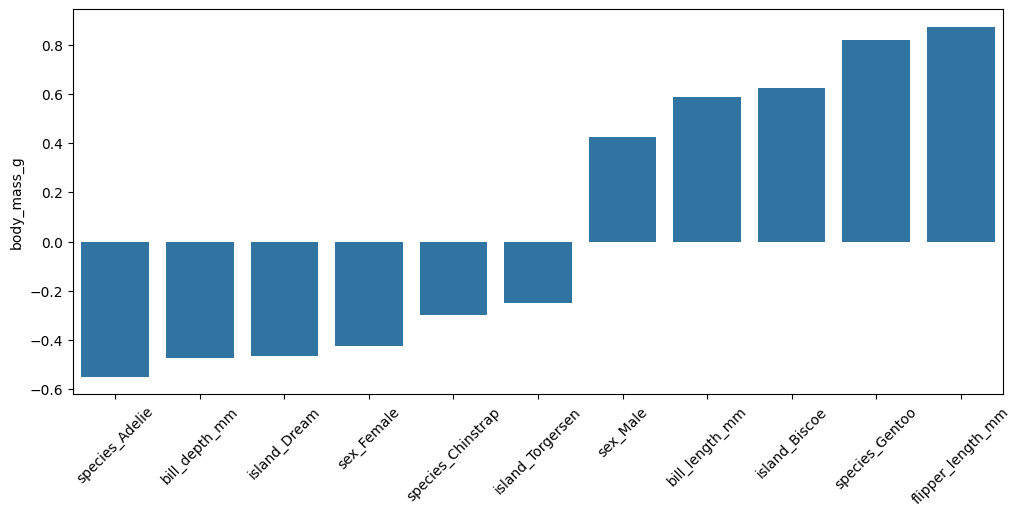

In [341]:
# correlaciones de cada columna con body_mass_g
plt.figure(figsize=(12, 5))
sns.barplot(df.corr()['body_mass_g'].drop('body_mass_g').sort_values())
plt.xticks(rotation=45);

In [342]:
# Separar X e y
X = df.drop('body_mass_g', axis=1)
y = df['body_mass_g']

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

r2 = r2_score(y, y_pred)
mae = mean_absolute_error(y, y_pred)
rmse = root_mean_squared_error(y, y_pred)
mape = mean_absolute_percentage_error(y, y_pred) # error del 5,5 % con respecto de valor real

df_resultados.loc[len(df_resultados)] = ['RLM 11 col', r2, mae, rmse, mape]
df_resultados

,Modelo,R2,MAE,RMSE,MAPE
0,RLM 3 col,0.763937,310.062518,390.637086,0.077183
1,RLM 11 col,0.875223,226.413652,284.005204,0.055982


In [343]:
# RLM con drop first en get_dummies, borra una de las columnas de cada dummies generados 
# para evitar correlación entre ellas, evitar multicolinealidad
# Observamos que da los mismos resultados que hacer un get_dummies normal
# Lo que sugiere que es mejor hacerlo con drop_first porque con menor cantidad de columnas logramos los mismos resultados
# Con menos columnas el modelo va a entrenar más ligero porque tiene que procesar menos datos
df = sns.load_dataset('penguins')
df.dropna(inplace=True)
df = pd.get_dummies(df, drop_first=True) # Agregar drop_first=True

X = df.drop('body_mass_g', axis=1)
y = df['body_mass_g']

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

r2 = r2_score(y, y_pred)
mae = mean_absolute_error(y, y_pred)
rmse = root_mean_squared_error(y, y_pred)
mape = mean_absolute_percentage_error(y, y_pred) # error del 5,5 % con respecto de valor real

df_resultados.loc[len(df_resultados)] = ['RLM 8 col', r2, mae, rmse, mape]
df_resultados

,Modelo,R2,MAE,RMSE,MAPE
0,RLM 3 col,0.763937,310.062518,390.637086,0.077183
1,RLM 11 col,0.875223,226.413652,284.005204,0.055982
2,RLM 8 col,0.875223,226.413652,284.005204,0.055982


In [344]:
# KNN - K Nearest Neighbors
from sklearn.neighbors import KNeighborsRegressor

df = sns.load_dataset('penguins')
df.dropna(inplace=True)
df = pd.get_dummies(df, drop_first=True) # Agregar drop_first=True

X = df.drop('body_mass_g', axis=1)
y = df['body_mass_g']


model = KNeighborsRegressor() # por defecto n_neighbors es 5
model.fit(X, y)
y_pred = model.predict(X)

r2 = r2_score(y, y_pred)
mae = mean_absolute_error(y, y_pred)
rmse = root_mean_squared_error(y, y_pred)
mape = mean_absolute_percentage_error(y, y_pred) # error del 5,5 % con respecto de valor real

df_resultados.loc[len(df_resultados)] = ['KNN k = 5', r2, mae, rmse, mape]
df_resultados


"\nmodel = KNeighborsRegressor() # por defecto n_neighbors es 5\nmodel.fit(X, y)\ny_pred = model.predict(X)\n\nr2 = r2_score(y, y_pred)\nmae = mean_absolute_error(y, y_pred)\nrmse = root_mean_squared_error(y, y_pred)\nmape = mean_absolute_percentage_error(y, y_pred) # error del 5,5 % con respecto de valor real\n\ndf_resultados.loc[len(df_resultados)] = ['KNN k = 5', r2, mae, rmse, mape]\ndf_resultados\n"

In [345]:
# bucle for para KNN para encontrar el mejor valor K
for k in range(2, 10):
    model = KNeighborsRegressor(n_neighbors=k) # el valor k cambiar en cada iteracion
    model.fit(X, y)
    y_pred = model.predict(X)

    r2 = r2_score(y, y_pred)
    mae = mean_absolute_error(y, y_pred)
    rmse = root_mean_squared_error(y, y_pred)
    mape = mean_absolute_percentage_error(y, y_pred) # error del 5,5 % con respecto de valor real

    df_resultados.loc[len(df_resultados)] = [f'KNN k = {k}', r2, mae, rmse, mape]
    df_resultados
    
df_resultados.sort_values('R2', ascending=False)

,Modelo,R2,MAE,RMSE,MAPE
3,KNN k = 2,0.922721,172.409910,223.507101,0.042347
4,KNN k = 3,0.894704,204.179179,260.894981,0.050295
5,KNN k = 4,0.885988,211.524024,271.477923,0.051974
6,KNN k = 5,0.876481,220.420420,282.569718,0.054214
1,RLM 11 col,0.875223,226.413652,284.005204,0.055982
2,RLM 8 col,0.875223,226.413652,284.005204,0.055982
7,KNN k = 6,0.874647,223.961461,284.660507,0.055181
8,KNN k = 7,0.869713,227.670528,290.208117,0.056204
9,KNN k = 8,0.865178,231.719219,295.216096,0.056983
10,KNN k = 9,0.861314,236.603270,299.415900,0.058211


KNN

Computacionalmente costoso, ya que es lazy o perezoso, realiza los cálculos en el predict
no existe un entrenamiento pesado como en los otros métodos, el modelo simplemente almacena los datos
en el entrenamiento, y para hacer una predicción (regresión o clasificación) busca y calcula los K vecinos más cercanos a cada punto (o instancia) que se quiere predecir

In [346]:
# escalado y volver a probar KNN
# KNN es sensible a la escala, debido al cálculo de distancias
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

for k in range(2, 10):
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_scaled, y)

    y_pred = model.predict(X_scaled)
    
    r2 = r2_score(y, y_pred)
    mae = mean_absolute_error(y, y_pred)
    rmse = root_mean_squared_error(y, y_pred)
    mape = mean_absolute_percentage_error(y, y_pred) # error del 3,8 % con respecto de valor real

    df_resultados.loc[len(df_resultados)] = [f'KNN scaled k = {k}', r2, mae, rmse, mape]
    df_resultados
    
df_resultados.sort_values('R2', ascending=False)

,Modelo,R2,MAE,RMSE,MAPE
11,KNN scaled k = 2,0.938673,157.057057,199.106488,0.038662
3,KNN k = 2,0.922721,172.409910,223.507101,0.042347
12,KNN scaled k = 3,0.922368,180.230230,224.015847,0.044620
13,KNN scaled k = 4,0.908940,194.050300,242.618359,0.048178
14,KNN scaled k = 5,0.903271,197.267267,250.056150,0.048960
15,KNN scaled k = 6,0.895868,205.993493,259.448877,0.051121
4,KNN k = 3,0.894704,204.179179,260.894981,0.050295
16,KNN scaled k = 7,0.894332,207.346632,261.355529,0.051363
17,KNN scaled k = 8,0.891224,209.984985,265.171347,0.051982
18,KNN scaled k = 9,0.889764,211.928595,266.944664,0.052495


In [347]:
# Particionamiento para Regresión lineal múltiple 8 col
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred) # error del x % con respecto de valor real

df_resultados.loc[len(df_resultados)] = ['RLM 8 col (test)', r2, mae, rmse, mape]
df_resultados.sort_values('R2', ascending=False)

,Modelo,R2,MAE,RMSE,MAPE
11,KNN scaled k = 2,0.938673,157.057057,199.106488,0.038662
3,KNN k = 2,0.922721,172.409910,223.507101,0.042347
12,KNN scaled k = 3,0.922368,180.230230,224.015847,0.044620
13,KNN scaled k = 4,0.908940,194.050300,242.618359,0.048178
14,KNN scaled k = 5,0.903271,197.267267,250.056150,0.048960
19,RLM 8 col (test),0.896169,196.208892,255.749079,0.048622
15,KNN scaled k = 6,0.895868,205.993493,259.448877,0.051121
4,KNN k = 3,0.894704,204.179179,260.894981,0.050295
16,KNN scaled k = 7,0.894332,207.346632,261.355529,0.051363
17,KNN scaled k = 8,0.891224,209.984985,265.171347,0.051982


In [348]:
# Particionamiento para KNN
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

for k in range(2,10):
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = root_mean_squared_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred) # error del x % con respecto de valor real

    df_resultados.loc[len(df_resultados)] = [f'KNN k = {k} (test)', r2, mae, rmse, mape]
    df_resultados.sort_values('R2', ascending=False)

In [349]:
df_resultados

,Modelo,R2,MAE,RMSE,MAPE
0,RLM 3 col,0.763937,310.062518,390.637086,0.077183
1,RLM 11 col,0.875223,226.413652,284.005204,0.055982
2,RLM 8 col,0.875223,226.413652,284.005204,0.055982
3,KNN k = 2,0.922721,172.409910,223.507101,0.042347
4,KNN k = 3,0.894704,204.179179,260.894981,0.050295
5,KNN k = 4,0.885988,211.524024,271.477923,0.051974
6,KNN k = 5,0.876481,220.420420,282.569718,0.054214
7,KNN k = 6,0.874647,223.961461,284.660507,0.055181
8,KNN k = 7,0.869713,227.670528,290.208117,0.056204
9,KNN k = 8,0.865178,231.719219,295.216096,0.056983


In [350]:
# Particionamiento con escalado para KNN: MinMaxScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
scaler = MinMaxScaler()
# introduce data leakage o fuga de datos o fuga de información
# porque entrena el scaler con datos de test que usar para escalar datos de train que enseña al modelo
# por tanto el modelo está recibiendo datos escalados influenciados por datos de test
# scaler.fit_transform(X)

X_train_scaled = scaler.fit_transform(X_train) # fit_transform solo sobre entrenamiento
X_test_scaled = scaler.transform(X_test)

for k in range(2, 30):
    model = KNeighborsRegressor(n_neighbors=k) # k = 2, 3, 4, 5, 6, 7, 8....
    model.fit(X_train_scaled, y_train)
    
    y_pred = model.predict(X_test_scaled)
    
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = root_mean_squared_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred) # error del x % con respecto de valor real

    df_resultados.loc[len(df_resultados)] = [f'KNN scaled k = {k} (test)', r2, mae, rmse, mape]

In [351]:
df_resultados.sort_values('R2', ascending=False)[df_resultados['Modelo'].str.contains('(test)')]

C:\Users\alanj\AppData\Local\Temp\ipykernel_25000\2844860035.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_resultados.sort_values('R2', ascending=False)[df_resultados['Modelo'].str.contains('(test)')]
C:\Users\alanj\AppData\Local\Temp\ipykernel_25000\2844860035.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_resultados.sort_values('R2', ascending=False)[df_resultados['Modelo'].str.contains('(test)')]


,Modelo,R2,MAE,RMSE,MAPE
19,RLM 8 col (test),0.896169,196.208892,255.749079,0.048622
49,KNN scaled k = 23 (test),0.882996,207.852044,271.487619,0.052733
50,KNN scaled k = 24 (test),0.882233,207.322761,272.372177,0.052495
51,KNN scaled k = 25 (test),0.882200,208.402985,272.410002,0.052608
46,KNN scaled k = 20 (test),0.881606,206.473881,273.095466,0.052269
47,KNN scaled k = 21 (test),0.881375,207.231699,273.362595,0.052570
48,KNN scaled k = 22 (test),0.881342,208.412483,273.400275,0.052824
52,KNN scaled k = 26 (test),0.880857,208.409874,273.957755,0.052650
38,KNN scaled k = 12 (test),0.880362,216.386816,274.526461,0.054716
53,KNN scaled k = 27 (test),0.879977,209.715312,274.967892,0.052871


In [352]:
# StandardScaler en regresión lineal múltiple
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# estandarización
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

df_resultados.loc[len(df_resultados)] = ['RLM 8 col scaled (test)', r2, mae, rmse, mape]


In [353]:
df_resultados.sort_values('R2', ascending=False)[df_resultados['Modelo'].str.contains('(test)')]

C:\Users\alanj\AppData\Local\Temp\ipykernel_25000\2844860035.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_resultados.sort_values('R2', ascending=False)[df_resultados['Modelo'].str.contains('(test)')]
C:\Users\alanj\AppData\Local\Temp\ipykernel_25000\2844860035.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_resultados.sort_values('R2', ascending=False)[df_resultados['Modelo'].str.contains('(test)')]


,Modelo,R2,MAE,RMSE,MAPE
56,RLM 8 col scaled (test),0.896169,196.208892,255.749079,0.048622
19,RLM 8 col (test),0.896169,196.208892,255.749079,0.048622
49,KNN scaled k = 23 (test),0.882996,207.852044,271.487619,0.052733
50,KNN scaled k = 24 (test),0.882233,207.322761,272.372177,0.052495
51,KNN scaled k = 25 (test),0.882200,208.402985,272.410002,0.052608
46,KNN scaled k = 20 (test),0.881606,206.473881,273.095466,0.052269
47,KNN scaled k = 21 (test),0.881375,207.231699,273.362595,0.052570
48,KNN scaled k = 22 (test),0.881342,208.412483,273.400275,0.052824
52,KNN scaled k = 26 (test),0.880857,208.409874,273.957755,0.052650
38,KNN scaled k = 12 (test),0.880362,216.386816,274.526461,0.054716


## CART Árbol de decisión para regresión

* Fácil interpretabilidad, scikit nos muestra el árbol resultante en texto e imagen
* No necesita el escalado
* No le afecta tanto los outliers
* Hace automáticamente los cortes umbrales para decidir los nodos
* Importante: ajustar la profundidad para evitar overfitting o sobreajuste
* Por sí solo puede ser débil, suele usarse en combinación de muchos árboles creando así un Random Forest
* Sensible si hay pocos datos
* Detecta autáticamente las categóricas

In [354]:
# sin particionamiento, haciendo predicciones sobre datos X con los que se ha entrenado
from sklearn.tree import DecisionTreeRegressor, export_text, plot_tree

model = DecisionTreeRegressor(max_depth=2) # profundidad 2 para poder ver el árbol
model.fit(X, y)

DecisionTreeRegressor(max_depth=2)

In [355]:
# ver el árbol en forma texto
print(export_text(model, feature_names=X.columns))

|--- species_Gentoo <= 0.50
|   |--- sex_Male <= 0.50
|   |   |--- value: [3419.16]
|   |--- sex_Male >  0.50
|   |   |--- value: [4010.28]
|--- species_Gentoo >  0.50
|   |--- sex_Male <= 0.50
|   |   |--- value: [4679.74]
|   |--- sex_Male >  0.50
|   |   |--- value: [5484.84]



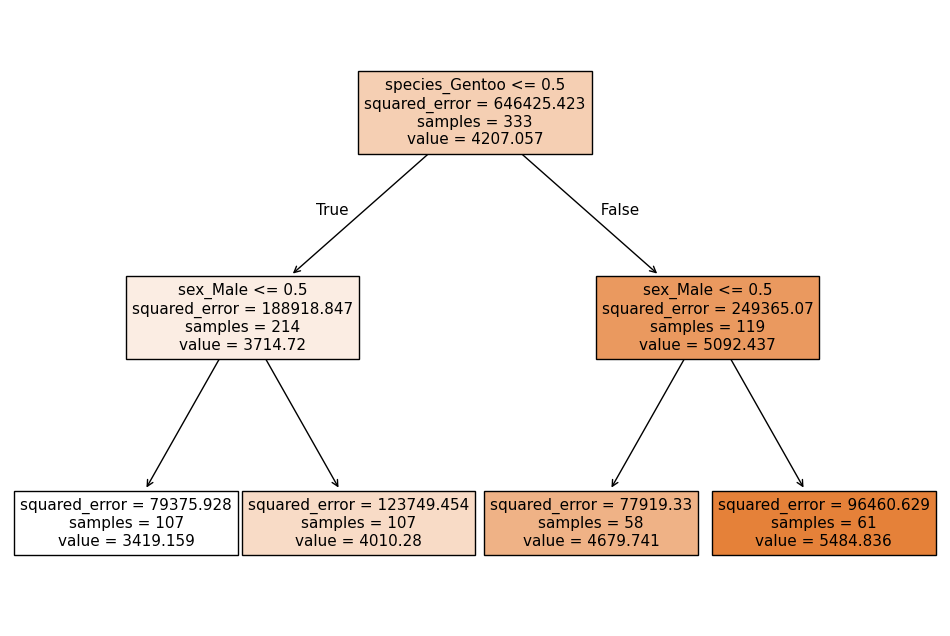

In [356]:
# ver el árbol en forma gráfico
plt.figure(figsize=(12,8))
plot_tree(model, feature_names=X.columns, filled=True);

In [357]:
# OPCIÓN 1: ÁRBOLES DE DECISIÓN (SIN PARTICIONAMIENTO)
for depth in range(2, 10): 
    model = DecisionTreeRegressor(max_depth=depth)
    model.fit(X, y)

    y_pred = model.predict(X)

    r2 = r2_score(y, y_pred)
    mae = mean_absolute_error(y, y_pred)
    rmse = root_mean_squared_error(y, y_pred)
    mape = mean_absolute_percentage_error(y, y_pred)

    df_resultados.loc[len(df_resultados)] = [f'DTR depth {depth}', r2, mae, rmse, mape]

In [358]:
# OPCIÓN 2: ÁRBOLES DE DECISIÓN (CON PARTICIONAMIENTO) (TEST)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
for depth in range(2, 10): 
    model = DecisionTreeRegressor(max_depth=depth)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = root_mean_squared_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)

    df_resultados.loc[len(df_resultados)] = [f'DTR depth {depth} (test)', r2, mae, rmse, mape]

In [359]:
# OPCIÓN 3: RANDOM FOREST (CON PARTICIONAMIENTO) (TEST)
from sklearn.ensemble import RandomForestRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
for depth in range(2, 15): 
    
    model = RandomForestRegressor(n_estimators=200, max_depth=depth) # n_estimators por defecto es 100 árboles
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = root_mean_squared_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)

    df_resultados.loc[len(df_resultados)] = [f'RF depth {depth} (test)', r2, mae, rmse, mape]

In [360]:
# df_resultados.sort_values('R2', ascending=False)[df_resultados['Modelo'].str.contains('DTR')]
df_resultados.sort_values('R2', ascending=False)[df_resultados['Modelo'].str.contains('(test)')]

C:\Users\alanj\AppData\Local\Temp\ipykernel_25000\3564591652.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_resultados.sort_values('R2', ascending=False)[df_resultados['Modelo'].str.contains('(test)')]
C:\Users\alanj\AppData\Local\Temp\ipykernel_25000\3564591652.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_resultados.sort_values('R2', ascending=False)[df_resultados['Modelo'].str.contains('(test)')]


,Modelo,R2,MAE,RMSE,MAPE
56,RLM 8 col scaled (test),0.896169,196.208892,255.749079,0.048622
19,RLM 8 col (test),0.896169,196.208892,255.749079,0.048622
76,RF depth 5 (test),0.889876,211.435694,263.384884,0.052736
75,RF depth 4 (test),0.888486,211.064363,265.041853,0.052793
49,KNN scaled k = 23 (test),0.882996,207.852044,271.487619,0.052733
74,RF depth 3 (test),0.882238,213.334392,272.365838,0.053534
50,KNN scaled k = 24 (test),0.882233,207.322761,272.372177,0.052495
51,KNN scaled k = 25 (test),0.882200,208.402985,272.410002,0.052608
46,KNN scaled k = 20 (test),0.881606,206.473881,273.095466,0.052269
47,KNN scaled k = 21 (test),0.881375,207.231699,273.362595,0.052570


# SVM - Support Vector Machines 

* SVR Regresión: https://scikit-learn.org/stable/auto_examples/svm/plot_svm_regression.html
* SVC Clasificación: 
    * https://scikit-learn.org/stable/auto_examples/svm/plot_svm_kernels.html
    * https://scikit-learn.org/stable/auto_examples/svm/plot_iris_svc.html

* Mapea los datos a un espacio de más dimensiones donde sí pueden separarse con un hiperplano
    * kernel lineal
    * kernel polinómico, (parámetro degree para ajustar el grado)
    * kernel rbf (por defecto)

Encontrar línea un hiperplano que separe los puntos de la mejor de la manera más clara posible. Cuánto mayor sea ese margen separando los grupos de puntos va a generalizar mejor, es decir, va a tener menor sobreajuste overfitting.

* C: controla cuánto penalizamos por salirse del margen o banda
    * 0.01, 0.1, 1, 10
    * Grado de penalización por error
    * Si es bajo tolera más errores, prioriza una banda más ancha

* epsilon: grosor de la banda o margen de no penalización, si es grande hay más tolerancia permite que los puntos se alejen
    * cuanto más grande es el epsilon, más ancho es el tubo, mayor tolerancia al error
    * por defecto: 0.1

* kernel: lineal, polinómico, rbf

In [361]:
from sklearn.svm import SVR

# C: Parámetro de regularización: controlar la penalización por errores de predicción (puntos fuera del margen)
# Valor bajo: poco estricto, permites más errores
# Valor alto: penaliza los errores, deja menor margen para errores
c_values = [0.001, 0.01, 0.1, 0.5, 1, 5, 10, 100, 500, 1000, 2000, 5000, 10000, 100_000, 1_000_000, 4_000_000]

# Alto: margen más amplio, permitiendo que el modelo pueda ignorar desviaciones o errores
# Bajo: eplison si es cercano a 0 no habrá margen para error, reduce tolerancia, 
# lo haría sensible a errores pequeños y produce overfitting
epsilon_values = [0.01, 0.1, 0.5, 1, 2, 5, 10, 100, 200]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

for c in c_values: 
    for e in epsilon_values:
        model = SVR(C=c, epsilon=e)
        
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)

        r2 = r2_score(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        rmse = root_mean_squared_error(y_test, y_pred)
        mape = mean_absolute_percentage_error(y_test, y_pred)

        df_resultados.loc[len(df_resultados)] = [f'SVR C {c} e {e} (test)', r2, mae, rmse, mape]

In [362]:
df_resultados.sort_values('R2', ascending=False)[df_resultados['Modelo'].str.contains('(test)')]

C:\Users\alanj\AppData\Local\Temp\ipykernel_25000\2844860035.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_resultados.sort_values('R2', ascending=False)[df_resultados['Modelo'].str.contains('(test)')]
C:\Users\alanj\AppData\Local\Temp\ipykernel_25000\2844860035.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_resultados.sort_values('R2', ascending=False)[df_resultados['Modelo'].str.contains('(test)')]


,Modelo,R2,MAE,RMSE,MAPE
56,RLM 8 col scaled (test),0.896169,196.208892,255.749079,0.048622
19,RLM 8 col (test),0.896169,196.208892,255.749079,0.048622
218,SVR C 1000000 e 10 (test),0.892106,203.708751,260.704720,0.050207
212,SVR C 1000000 e 0.01 (test),0.892031,203.888751,260.795092,0.050185
213,SVR C 1000000 e 0.1 (test),0.892019,203.891213,260.810124,0.050185
...,...,...,...,...,...
88,SVR C 0.001 e 0.5 (test),-0.025394,648.878829,803.703140,0.152211
91,SVR C 0.001 e 5 (test),-0.025394,648.878829,803.703140,0.152211
90,SVR C 0.001 e 2 (test),-0.025394,648.878829,803.703140,0.152211
86,SVR C 0.001 e 0.01 (test),-0.025394,648.878829,803.703140,0.152211


El mejor modelo ha sido la regresión lineal múltiple utilizando 8 columnas en la entrada X